# GIS-Based Traffic Simulation with Mesa
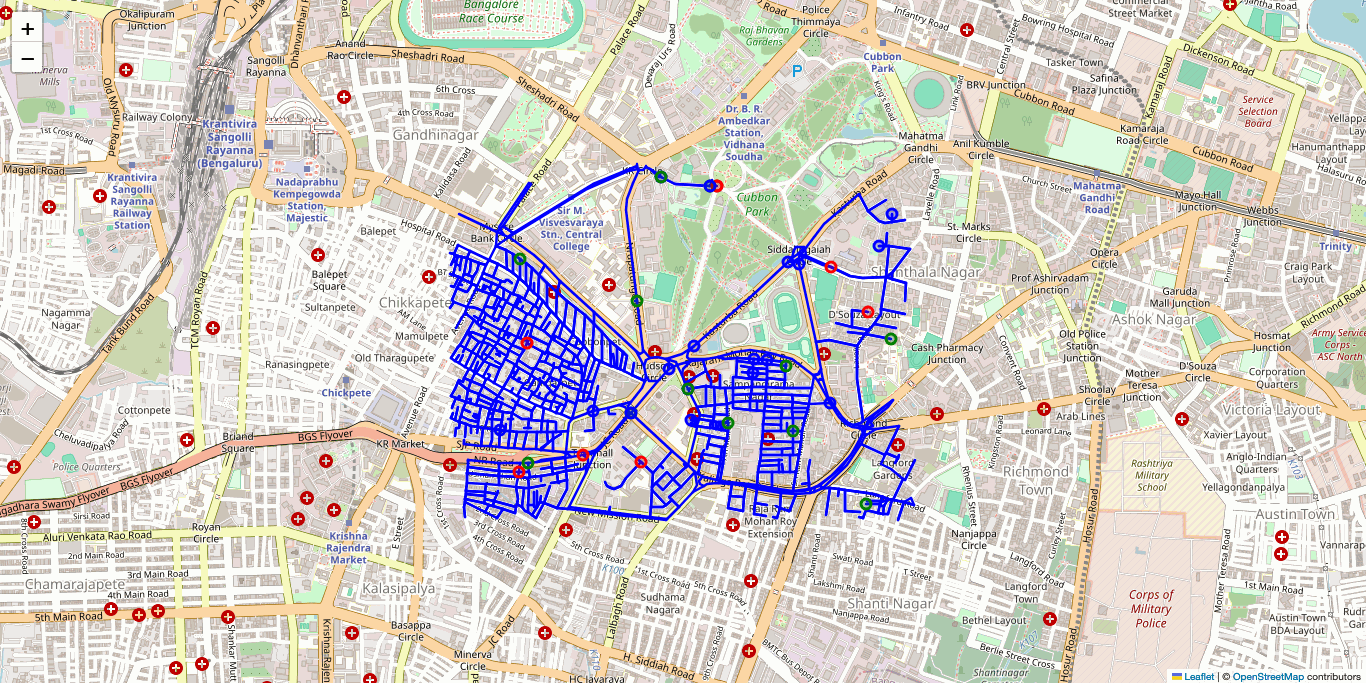

## Overview

This project is a GIS-based traffic simulation tool, built with Mesa, designed to model and visualize vehicle movements on real road networks. It aids urban planners and policymakers in understanding and optimizing traffic flow by simulating congestion and evaluating management strategies.

## Purpose

Visvalizing the flow of traffic simulating by Gif  


## Key Features

- **Real Road Networks** via OSMnx
- **Dynamic Traffic Simulation** of vehicle movements
- **Customizable Parameters** for tailored simulations

## Installation

- Python 3.x
- Mesa
- OSMnx
- NetworkX

## Usage

1. **Input Parameters:** Set vehicle count, start, and end points.
2. **Run Simulation:** Observe traffic flow and congestion.
3. **Analyze Results:** Review simulation outputs.

## How It Works

1. **Import Network:** Use OSMnx to load road data.
2. **Initialize Simulation:** Set up with Mesa and Mesa-Geo.
3. **Simulate Flow:** Vehicles move using NetworkX's shortest paths.



# Importing Libraries

- **Mesa**provide the foundation for building the agent-based model with geographic context.
- **GeoPandas** enables us to handle and manipulate geographic data easily, making it possible to integrate real-world maps and spatial data into our simulation.
- **Shapely** allows us to define and work with geometric shapes, which is crucial for positioning agents and defining their movement paths.
- **Random** helps in adding variability and realism to the simulation by introducing random elements, such as varying agent behaviors and routes.
- **PIL (Python Imaging Library)** provides image processing capabilities, allowing us to handle images within the simulation, such as loading and displaying maps or other visual elements.
- **io** enables in-memory operations, allowing us to work with image data without needing to save it to disk first.

By importing these libraries, we ensure that we have the necessary tools to build a robust and realistic GIS-based traffic simulation. Each library plays a vital role in different aspects of the project, from data handling and agent behavior to geographic visualization and image processing.

## Mesa is Playing a Main Role in This Model
Mesa provides a straightforward and efficient framework to create, manage, and simulate the movement of vehicles on a road network. It allows for the simple creation of agents (vehicles) that follow predefined paths, interact within a given space, and produce simulation results without unnecessary complexity.

**Mesa** is used because it enables you to build a functional and effective traffic simulation without overcomplicating the model. Its integration with other libraries like **OSMnx** and **NetworkX** ensures that the model remains easy to understand and maintain, focusing on delivering practical insights rather than adding complexity.

## Simulation with Road network 

In [1]:
import io
import os

import folium
import networkx as nx
import osmnx as ox
from IPython.display import Image as IPImage
from IPython.display import display
from PIL import Image

from agent import VehicleAgent
from model import TrafficModel

# Bounding box coordinates for Bangalore
north, south, east, west = (
    12.976,
    12.961,
    77.599,
    77.579,
)  # Adjusted coordinates for Bangalore

# Create a graph from the bounding box using the bbox parameter
bbox = (north, south, east, west)
G = ox.graph_from_bbox(north, south, east, west, network_type="drive")

# Extract graph bounds
min_x = min(nx.get_node_attributes(G, "x").values())
max_x = max(nx.get_node_attributes(G, "x").values())
min_y = min(nx.get_node_attributes(G, "y").values())
max_y = max(nx.get_node_attributes(G, "y").values())

# Running the modified TrafficModel
num_vehicles = 51
model = TrafficModel(G, num_vehicles)

# Ensure the directory exists
gif_dir = "Data/"
os.makedirs(gif_dir, exist_ok=True)

# Running the simulation and updating the Folium map
map_images = []
for _ in range(10):  # Run for 10 steps
    model.step()

    # Create a new map for each step
    temp_map = folium.Map(
        location=[(north + south) / 2, (east + west) / 2], zoom_start=15
    )

    # Add the road network to the map
    edges = ox.graph_to_gdfs(G, nodes=False, edges=True)
    for _, row in edges.iterrows():
        points = [
            (row["geometry"].coords[i][1], row["geometry"].coords[i][0])
            for i in range(len(row["geometry"].coords))
        ]
        folium.PolyLine(points, color="blue", weight=2.5, opacity=1).add_to(temp_map)

    # Add vehicles to the map
    for vehicle in model.schedule.agents:
        if isinstance(vehicle, VehicleAgent):
            vehicle_position = (
                vehicle.model.space.G.nodes[vehicle.route[vehicle.current_step - 1]][
                    "y"
                ],
                vehicle.model.space.G.nodes[vehicle.route[vehicle.current_step - 1]][
                    "x"
                ],
            )
            color = (
                "red"
                if vehicle.vehicle_type == "car"
                else "blue"
                if vehicle.vehicle_type == "truck"
                else "green"
            )
            folium.CircleMarker(
                location=vehicle_position, radius=5, color=color, fill=True
            ).add_to(temp_map)

    # Save the map state as an image
    img_data = temp_map._to_png(5)
    img = Image.open(io.BytesIO(img_data))
    map_images.append(img)

# Create an animated GIF from the saved map images
gif_path = os.path.join(gif_dir, "bangalore_traffic_congestion.gif")
map_images[0].save(
    gif_path, save_all=True, append_images=map_images[1:], duration=500, loop=0
)

# Display the animated GIF in the notebook
display(IPImage(filename=gif_path))

print(
    "Simulation complete. Check the notebook for the Bangalore traffic congestion animation."
)

TypeError: graph_from_bbox() takes 1 positional argument but 4 positional arguments (and 1 keyword-only argument) were given

## Simulation without Road network 

# Future Enhancements
**Real-Time Data Integration:**
Integrate real-time traffic data to dynamically simulate and visualize current traffic conditions.

**Multiple Congestion Scenarios:**
Simulate and compare different congestion scenarios to identify the most effective traffic management strategies.

**User Interaction:**
Develop a user interface allowing users to input custom start and end points, define congestion levels, and visualize the impact of different traffic management interventions.\

**Extended Analysis:**
Analyze the impact of various factors (e.g., weather, construction, events) on traffic congestion and flow.

**Integration with Traffic Control Systems:**
Interface the simulation with traffic control systems to provide real-time feedback and optimization suggestions.
